In [1]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping 
import matplotlib.pyplot as plt
# from keras.applications.vgg16 import VGG16
# from keras.applications.vgg16 import preprocess_input
# from keras.preprocessing.image import ImageDataGenerator
# from keras.models import model_from_json
# from keras.applications.densenet import DenseNet169

In [2]:
cifar10=keras.datasets.cifar10

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


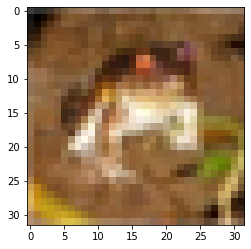

In [5]:
plt.imshow(x_train[0])

In [6]:
x_train=x_train/255
x_test=x_test/255

In [43]:
# y_train=keras.utils.to_categorical(y_train,num_classes=10)
# y_test=keras.utils.to_categorical(y_test,num_classes=10)

In [8]:
y_train[0]

array([6], dtype=uint8)

In [9]:
x_test.shape[1:]

(32, 32, 3)

In [37]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=x_test.shape[1:]))
model.add(keras.layers.MaxPooling2D(padding='same'))
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(padding='same'))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(padding='same'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(10, activation='softmax'))



# model=keras.Sequential([
#                         keras.Input(shape=(32,32,3)),
#                         keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',name='First_Conv_layer'),
#                         keras.layers.MaxPool2D((2,2),name='First_Max_pooling'),
#                         keras.layers.Conv2D(64,3,padding='same',activation='relu',name='second_Conv_layer'),
#                         keras.layers.MaxPool2D((2,2),name='second_Max_pooling'),
#                         keras.layers.Conv2D(128,3,padding='same',activation='relu',name='third_Conv_layer'),
#                         keras.layers.MaxPool2D((2,2),name='third_Max_pooling'),
#                         keras.layers.Flatten(),
#                         keras.layers.Dense(64,activation='relu'),
#                         keras.layers.Dense(10,activation='softmax')
# ])

In [38]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 5, 5, 64)          18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 3, 3, 64)        

In [39]:
model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy']
             )



# model.compile(
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#     optimizer=tf.keras.optimizers.Adam(),
#     metrics=['accuracy']
# )
# model.fit(x_train,y_train,epochs=10,batch_size=64)

In [40]:
callbacks=[EarlyStopping(monitor='val_accuracy',patience=3)]

In [42]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=64,callbacks=callbacks)

Epoch 1/20
782/782 [==============================] - 63s 81ms/step - loss: 0.6248 - accuracy: 0.7803 - val_loss: 0.8633 - val_accuracy: 0.7040
Epoch 2/20
782/782 [==============================] - 66s 84ms/step - loss: 0.5965 - accuracy: 0.7905 - val_loss: 0.8734 - val_accuracy: 0.7067
Epoch 3/20
782/782 [==============================] - 65s 83ms/step - loss: 0.5730 - accuracy: 0.7987 - val_loss: 0.9082 - val_accuracy: 0.7002
Epoch 4/20
782/782 [==============================] - 66s 84ms/step - loss: 0.5431 - accuracy: 0.8078 - val_loss: 0.9040 - val_accuracy: 0.7070
Epoch 5/20
782/782 [==============================] - 65s 84ms/step - loss: 0.5274 - accuracy: 0.8153 - val_loss: 0.8056 - val_accuracy: 0.7388
Epoch 6/20
782/782 [==============================] - 63s 81ms/step - loss: 0.5034 - accuracy: 0.8237 - val_loss: 0.9293 - val_accuracy: 0.7081
Epoch 7/20
782/782 [==============================] - 61s 78ms/step - loss: 0.4868 - accuracy: 0.8265 - val_loss: 0.8423 - val_accuracy:

In [28]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.8233 - accuracy: 0.7472


[0.8233461976051331, 0.7472000122070312]

In [55]:
x_test[0].shape

(32, 32, 3)

In [56]:
model.predict(x_test[0].reshape(1, 32, 32, 3)).argmax()

1/1 [==============================] - 0s 31ms/step


3

In [57]:
y_test.argmax(axis=1)

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

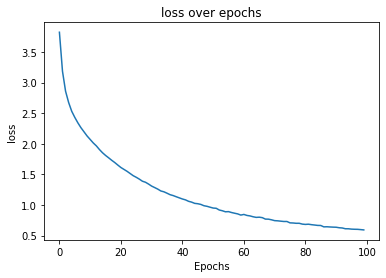

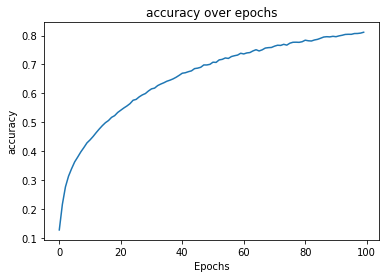

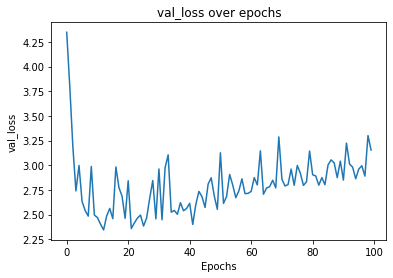

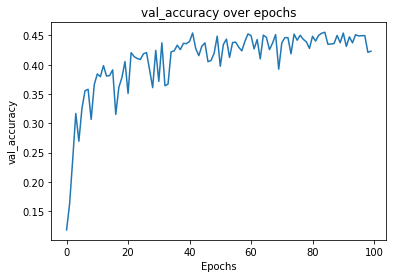

In [82]:
for j in list(history.history.keys()):
    plt.plot(history.history[j])
    plt.title(j + ' over epochs')
    plt.ylabel(j)
    plt.xlabel('Epochs')
    plt.show()

In [83]:
plt.rcParams["figure.figsize"] = (20,20)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


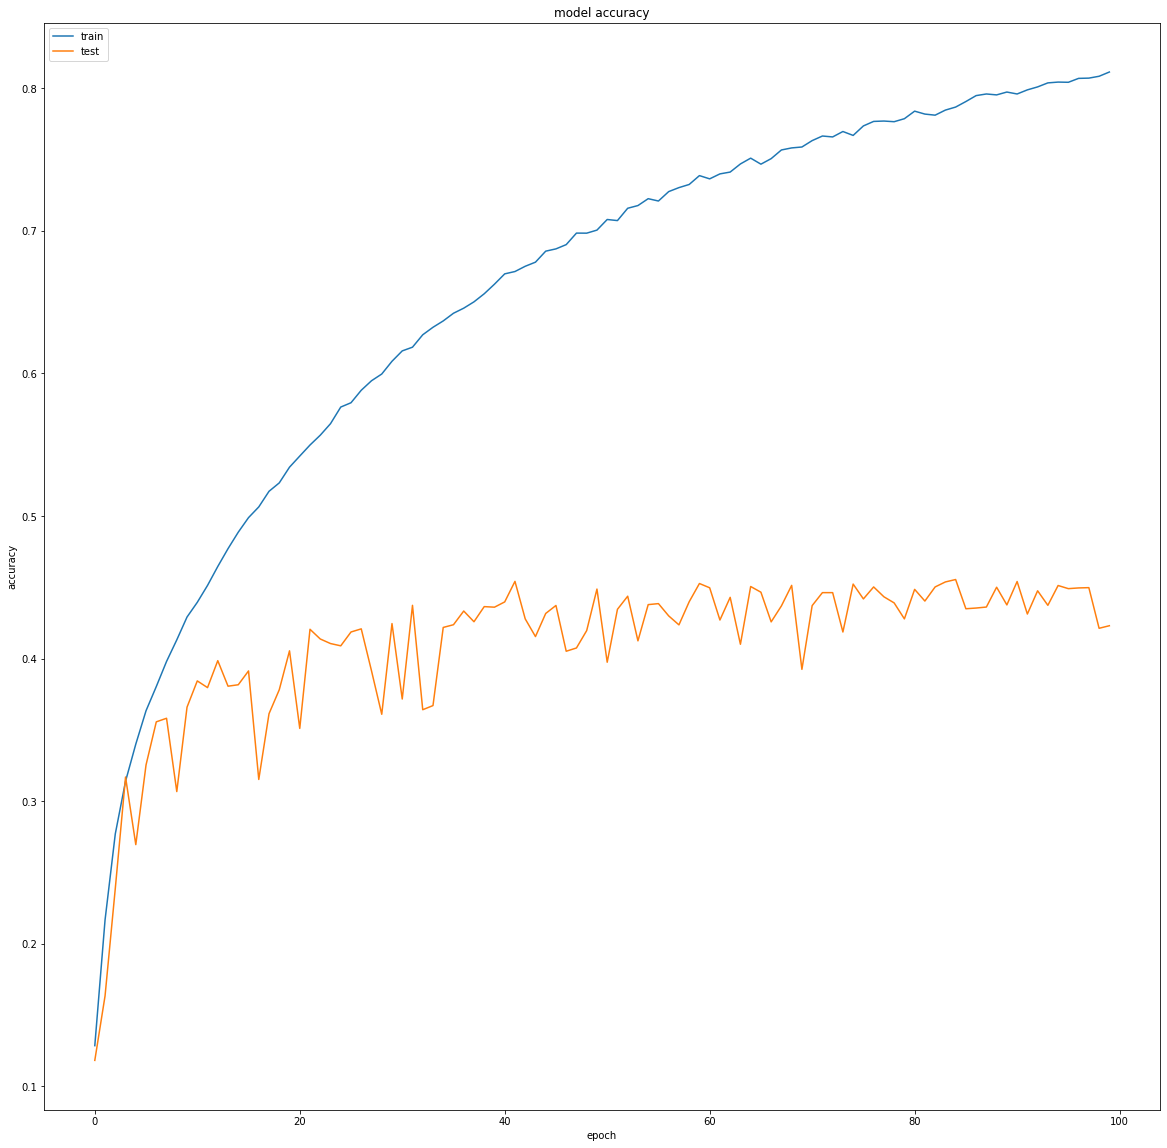

In [84]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.show()
plt.savefig('accuracy.png')

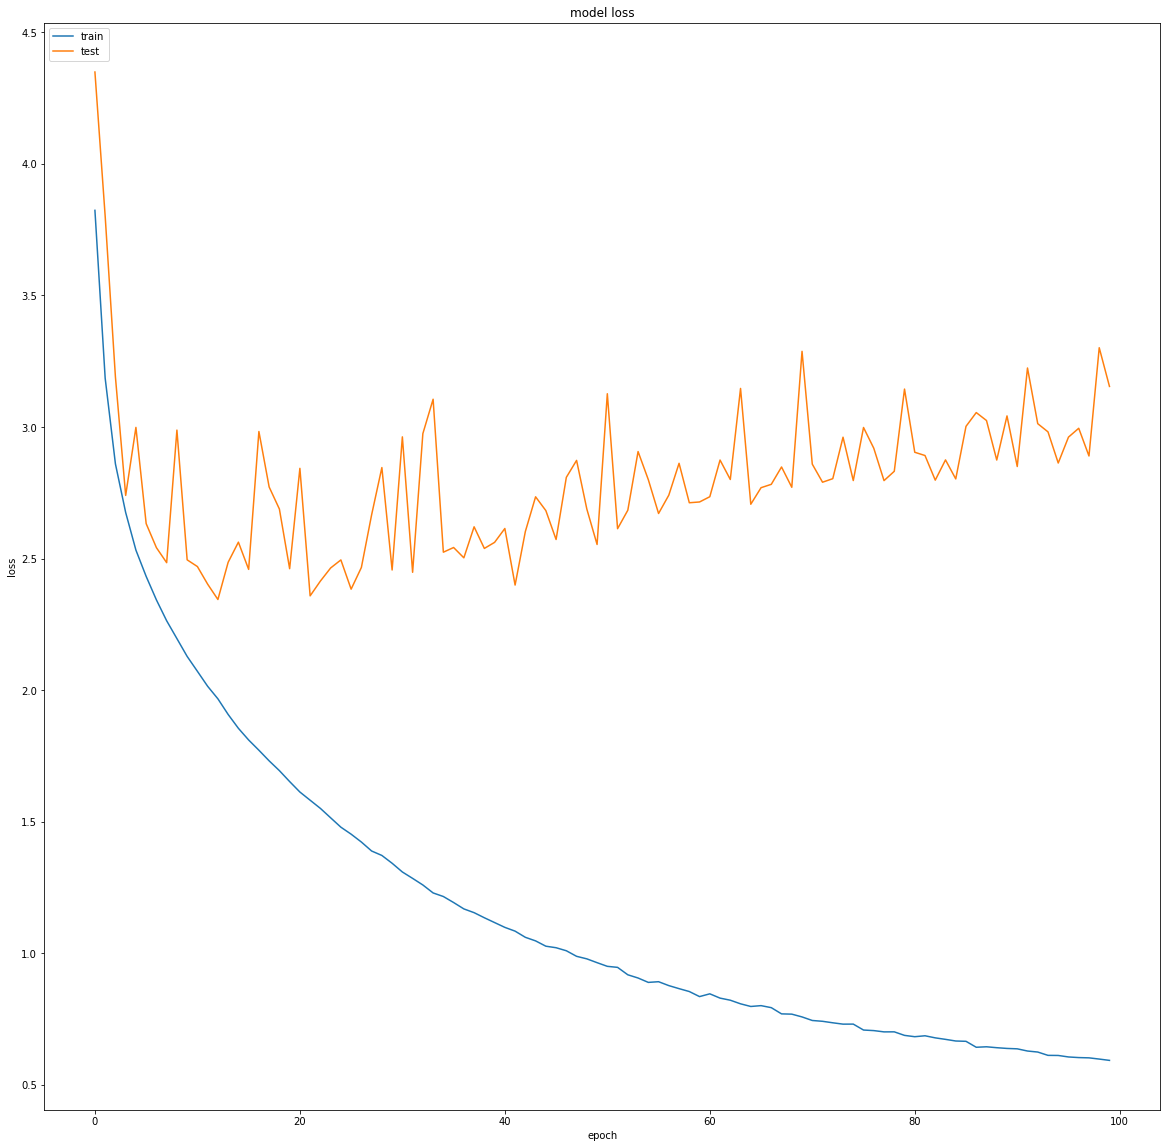

In [85]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.show()
plt.savefig('loss.png')

In [87]:
model_json = model.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model1.h5")
print("Saved model to disk")

Saved model to disk


In [5]:
json_file = open('model1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model1.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(optimizer=keras.optimizers.Adam(),
             loss='categorical_crossentropy',
             metrics=['accuracy']
             )
# score = loaded_model.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk


In [8]:
loaded_model.input

<KerasTensor: shape=(None, 32, 32, 3) dtype=float32 (created by layer 'conv2d_24_input')>